<a href="https://colab.research.google.com/github/jeefery/Advisor/blob/main/PedagangAI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0685
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 4.1378e-04
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 3.9518e-04
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 3.6192e-04
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 4.3441e-04
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 2.9399e-04
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.3376e-04
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 2.9045e-04
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 2.8635e-04
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 3.1144e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Predicted Price for the Next Hour: 0.42954275012016296
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


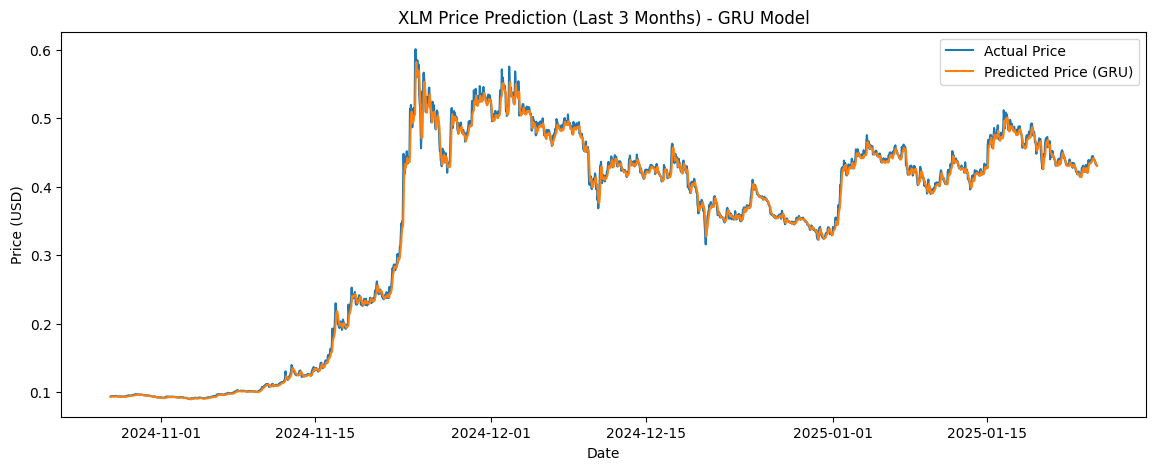

In [1]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Step 1: Fetch Historical Data
ticker_symbol = "XLM-USD"
data = yf.download(ticker_symbol, period="3mo", interval="1h")

# Step 2: Preprocess the Data
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Create sequences of data for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 hours of data to predict the next hour
X, y = create_sequences(scaled_prices, seq_length)

# Reshape X to be compatible with GRU input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Build and Train the GRU Model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=32, epochs=10)

# Step 4: Make Predictions
last_sequence = scaled_prices[-seq_length:]
last_sequence = last_sequence.reshape(1, seq_length, 1)

# Predict the next hour's price
predicted_price_scaled = model.predict(last_sequence)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted Price for the Next Hour: {predicted_price[0][0]}")

# Step 5: Visualize the Results
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

plt.figure(figsize=(14, 5))
plt.plot(data.index[seq_length:], close_prices[seq_length:], label="Actual Price")
plt.plot(data.index[seq_length:], train_predict, label="Predicted Price (GRU)")
plt.title("XLM Price Prediction (Last 3 Months) - GRU Model")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.2508
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0430
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0428
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0276
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0183
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0235
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0234
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0171
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0174
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━

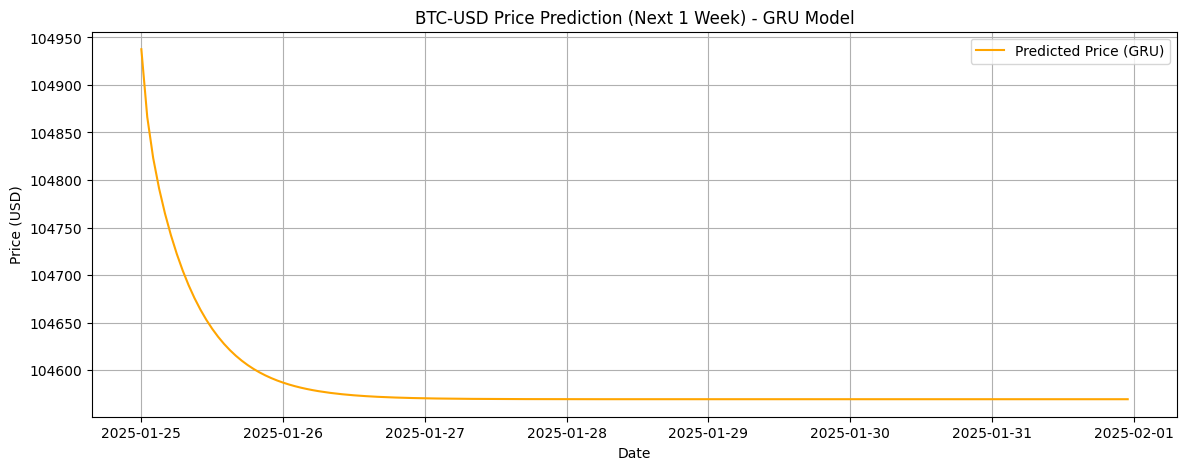

In [1]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from datetime import timedelta

# Step 1: Fetch Historical Data
ticker_symbol = "BTC-USD"
try:
    # Fetch 1 week of hourly data
    data = yf.download(ticker_symbol, period="1wk", interval="1h")
    if data.empty:
        raise ValueError(f"No data found for {ticker_symbol}.")
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

# Step 2: Preprocess the Data
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Create sequences of data for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 hours of data to predict the next hour
try:
    X, y = create_sequences(scaled_prices, seq_length)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for GRU input
except Exception as e:
    print(f"Error creating sequences: {e}")
    exit()

# Step 3: Build and Train the GRU Model
try:
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(GRU(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, batch_size=32, epochs=10, verbose=1)
except Exception as e:
    print(f"Error building or training the model: {e}")
    exit()

# Step 4: Generate Predictions for the Next Week
try:
    # Use the last `seq_length` hours of data to predict the next hour
    last_sequence = scaled_prices[-seq_length:]
    predictions = []

    # Predict the next 168 hours (1 week)
    for _ in range(168):  # 168 hours = 1 week
        last_sequence_reshaped = last_sequence.reshape(1, seq_length, 1)
        predicted_price_scaled = model.predict(last_sequence_reshaped)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)
        predictions.append(predicted_price[0][0])

        # Update the sequence with the predicted value
        last_sequence = np.append(last_sequence[1:], predicted_price_scaled, axis=0)

    # Create a DataFrame for the predictions
    last_timestamp = data.index[-1]
    prediction_timestamps = [last_timestamp + timedelta(hours=i) for i in range(1, 169)]
    predictions_df = pd.DataFrame({
        'Timestamp': prediction_timestamps,
        'Predicted Price': predictions
    })
    predictions_df.set_index('Timestamp', inplace=True)

    print("Predicted Prices for the Next Week:")
    print(predictions_df.head())
except Exception as e:
    print(f"Error generating predictions: {e}")
    exit()

# Step 5: Visualize the Predictions for the Next Week
try:
    plt.figure(figsize=(14, 5))
    plt.plot(predictions_df.index, predictions_df['Predicted Price'], label="Predicted Price (GRU)", color='orange')
    plt.title(f"{ticker_symbol} Price Prediction (Next 1 Week) - GRU Model")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()
except Exception as e:
    print(f"Error visualizing results: {e}")

In [ ]:
pip install yfinance pandas ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=5f99869da374355aaabc3cb99c67e65a4c9766bf6a5a9400b00b99e6c139faa0
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:

import yfinance as yf
import pandas as pd
import ta  # Technical analysis library

# CAREPLS stock symbol on KLSE
CAREPLS_SYMBOL = "0163.KL"

# Function to fetch stock data and calculate indicators
def fetch_stock_data(symbol, period='1d', interval='15m'):
    """
    Fetch stock data and calculate technical indicators.
    """
    stock = yf.download(symbol, period=period, interval=interval)
    if stock.empty:
        return None

    # Calculate technical indicators
    stock['RSI'] = ta.momentum.rsi(stock['Close'], window=14)
    stock['SMA_20'] = ta.trend.sma_indicator(stock['Close'], window=20)
    stock['EMA_50'] = ta.trend.ema_indicator(stock['Close'], window=50)
    stock['Volume_MA'] = ta.trend.sma_indicator(stock['Volume'], window=10)

    return stock

# Function to screen for BTST opportunities
def btst_screener(symbol):
    """
    Screen CAREPLS stock for BTST opportunities based on momentum, volume, and price action.
    """
    print(f"Analyzing {symbol}...")
    stock_data = fetch_stock_data(symbol)

    if stock_data is None:
        print(f"No data found for {symbol}.")
        return None

    # Get the latest data point
    latest = stock_data.iloc[-1]

    # Define BTST criteria
    momentum_condition = latest['RSI'] > 50  # RSI above 50 indicates bullish momentum
    volume_condition = latest['Volume'] > 1.5 * latest['Volume_MA']  # Volume spike
    price_condition = latest['Close'] > latest['SMA_20']  # Price above 20-day SMA

    if momentum_condition and volume_condition and price_condition:
        print(f"\nBTST Opportunity Found for {symbol}:")
        print(f"Close Price: {latest['Close']}")
        print(f"RSI: {latest['RSI']}")
        print(f"Volume: {latest['Volume']}")
        print(f"20-Day SMA: {latest['SMA_20']}")
    else:
        print(f"No BTST opportunity found for {symbol}.")

# Run the screener for CAREPLS
if __name__ == "__main__":
    print("Running BTST Screener for CAREPLS...")
    btst_screener(CAREPLS_SYMBOL)

Running BTST Screener for CAREPLS...
Analyzing 0163.KL...


[*********************100%***********************]  1 of 1 completed


ValueError: Data must be 1-dimensional, got ndarray of shape (16, 1) instead